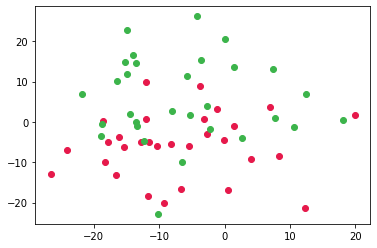

[[ 10.56717222  -1.26754834]
 [-18.24477472 -10.02558072]
 [ -0.06219459  -4.52269642]
 [-12.00252418   0.63107645]
 [ -2.66734108  -2.91675873]
 [ 18.07624844   0.35268821]
 [  7.45391719  13.01944794]
 [-10.32600893  -5.94791021]
 [-13.40063975  -0.97009738]
 [ -5.27688886   1.73876645]
 [  6.9093727    3.66555589]
 [ -2.70295956   3.95638453]
 [-16.38150304  10.10691579]
 [ -8.20476003  -5.56165739]
 [-14.0271721   16.6279705 ]
 [-12.36596776  -4.82937089]
 [-13.56373883  -0.08474079]
 [  1.52751193  -0.88779291]
 [ 12.37560581 -21.21523686]
 [-11.61028458  -4.96064994]
 [-16.16784512  -3.85679607]
 [ -3.16666115   0.72118755]
 [-11.75656413 -18.43870111]
 [-17.79692211  -5.08003257]
 [ -3.81007888   8.82386148]
 [-24.0496699   -6.98792838]
 [ -8.04580444   2.67516202]
 [  1.38522276  13.63359876]
 [-18.78567733  -0.58213878]
 [-11.99353187   9.98193528]
 [  0.10910363  20.52890866]
 [ -6.65724674 -16.68023443]
 [ -9.20738028 -19.96687122]
 [ -4.23476002  26.18217427]
 [-15.32272658

In [10]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import sklearn.datasets
import sys
sys.path.append('..')
from utils import get_classification_data, show_data, visualise_predictions, colors

m = 60
n_features = 2
n_classes = 2
X, Y = get_classification_data(sd=10, m=60, n_clusters=n_classes, n_features=n_features)
show_data(X, Y)
print(X, Y)

In [24]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
    
    def insertLeft(self, node):
        self.left = node
        return node
    
    def insertRight(self, node):
        self.right = node
        return node

    def clearData(self):
        self.data = None
    

In [41]:
class classificationTree:
    def __init__(self,max_depth = 10):
        self.max_depth = max_depth

    def predict(self, X, y):       
        # define functions
        def find_best_split(X, y):
            best_feature_idx = 0
            best_impurity = 1
            splitPoint = 0
            for feature_idx, examples in enumerate(X.T): # loop through each feature
                current_impurity, current_splitpoint = find_best_split_on_feature(examples, y)
                # if this impurity is less than previous impurity, update best impurity, feature, and split point
                if current_impurity < best_impurity:
                    impurity = current_impurity
                    best_feature_idx = feature_idx
                    splitPoint = current_splitpoint
            return best_feature_idx, splitPoint, best_impurity
        
        def find_best_split_on_feature(x, y): # takes in a list of examples for one feature
            best_impurity = 1
            best_split_point = 0
            for i in range(len(x) - 1): # loop through Xs until X-1
                splitPoint = np.mean((x[i], x[i+1]))
                current_impurity = get_impurity(splitPoint, x, y)
                # if this impurity is less the previous impurity, update best impurity and best split point
                if current_impurity < best_impurity:
                    best_impurity = current_impurity
                    best_split_point = splitPoint
            return best_impurity, best_split_point

        
        def get_impurity(split_point, x, y): # get the impurity
            left_labels = y[x < split_point]
            right_labels = y[x > split_point]
            p_squared = 0

            # run gini impurity for left side 
            for _class in np.unique(y): # gini_impurity_per_region()
                class_count = np.count_nonzero(left_labels == _class) 
                p_squared += (class_count/len(left_labels))**2
            left_side_impurity = 1 - p_squared

            # run gini impurity for right side
            p_squared = 0
            for _class in np.unique(y): # gini_impurity_per_region()
                class_count = np.count_nonzero(right_labels == _class) 
                p_squared += (class_count/len(right_labels))**2
            right_side_impurity = 1 - p_squared

            # return total gini impurity
            proportion_left = len(left_labels) / len(x)
            proportion_right = len(right_labels) / len(x)
            impurity = proportion_left * left_side_impurity + proportion_right * right_side_impurity
            return impurity 
            
        
        def grow_tree(node, y, depth): # recurring function to grow the tree
            # get split point with lowest impurity
            feature, split_point, impurity = find_best_split(node.data, y)   
            if impurity > 0 and depth < self.max_depth: # check if node.data.impurity is greater than 0
                X = node.data
                # put data of every feature into left_data if it is < split_point
                left_data = np.array([row[X[:, feature] < split_point] for row in X.T])
                # put data of every feature into right_data if it is >= split_point 
                right_data = np.array([row[X[:, feature] >= split_point] for row in X.T])
                print(left_data, right_data)

                node.insertLeft(Node(left_data)) # insert left data into left node
                node.insertRight(Node(right_data)) # insert right data into right node
                node.clearData() # clearData in current node
                # run grow_tree() on left node and right node
                grow_tree(node.left, y, depth = depth + 1)
                grow_tree(node.right, y, depth = depth + 1) 
        
        # create root node, initialise depth, and grow the classification tree
        root = Node(X)
        depth = 0
        grow_tree(root, y, depth)
        
        return root

    

In [42]:
model = classificationTree(2)
print(model.predict(X,Y))

[[-18.24477472  -0.06219459 -10.32600893  -8.20476003 -12.36596776
   12.37560581 -11.61028458 -11.75656413 -17.79692211 -24.0496699
   -6.65724674  -9.20738028 -15.32272658  -5.4238444    4.05975408
  -26.6290537   -6.49431257   8.2951378  -16.60029134 -10.15217427
    0.57483379 -12.72812458]
 [-10.02558072  -4.52269642  -5.94791021  -5.56165739  -4.82937089
  -21.21523686  -4.96064994 -18.43870111  -5.08003257  -6.98792838
  -16.68023443 -19.96687122  -6.23503675  -5.9287644   -9.2796818
  -12.90523311  -9.86110324  -8.50626001 -13.23604906 -22.79378278
  -16.77293127  -4.98500372]] [[ 10.56717222 -12.00252418  -2.66734108  18.07624844   7.45391719
  -13.40063975  -5.27688886   6.9093727   -2.70295956 -16.38150304
  -14.0271721  -13.56373883   1.52751193 -16.16784512  -3.16666115
   -3.81007888  -8.04580444   1.38522276 -18.78567733 -11.99353187
    0.10910363  -4.23476002  -1.15241552  -2.29763242  19.95769418
   12.41905189 -13.54275081 -15.28445138   2.63743523  -5.70563122
  -18

IndexError: boolean index did not match indexed array along dimension 0; dimension is 60 but corresponding boolean dimension is 2